In [19]:
# test addresses list, now supersceded by the hospital dataset.
'''
addresses = [
    "King's Parade, Cambridge CB2 1SJ, UK",
    "Trinity College, Cambridge CB2 1TQ, UK",
    "24 Hills Road, Cambridge CB2 0QQ, UK",
    "St John's College, St John's St, Cambridge CB2 1TP, UK",
    "Parker's Piece, Cambridge CB1 1JF, UK",
    "The Clarendon Arms, 35 Clarendon Street, Cambridge CB1 1JX, UK",
    "5 Sidgwick Avenue, Cambridge CB3 9DA, UK",
    "10 West Road, Cambridge CB3 9DZ, UK",
    "Cambridge Science Centre, 44 Clifton Rd, Cambridge CB1 7ED, UK"]
'''  



'\naddresses = [\n    "King\'s Parade, Cambridge CB2 1SJ, UK",\n    "Trinity College, Cambridge CB2 1TQ, UK",\n    "24 Hills Road, Cambridge CB2 0QQ, UK",\n    "St John\'s College, St John\'s St, Cambridge CB2 1TP, UK",\n    "Parker\'s Piece, Cambridge CB1 1JF, UK",\n    "The Clarendon Arms, 35 Clarendon Street, Cambridge CB1 1JX, UK",\n    "5 Sidgwick Avenue, Cambridge CB3 9DA, UK",\n    "10 West Road, Cambridge CB3 9DZ, UK",\n    "Cambridge Science Centre, 44 Clifton Rd, Cambridge CB1 7ED, UK"]\n'

In [42]:
# importing necessary libraries
import osmnx as ox
import networkx as nx
import folium
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
import pandas as pd
import numpy as np
import itertools
import math


In [43]:
#coords_list = [geolocator.geocode(address).point[:2] for address in addresses]
city_or_county= 'Bedford'

In [44]:
# hospital data function
# testing the workbook to take into account how to process data from hospital.csv for tsp use.

def hospital_data():
    hospitals = pd.read_csv('../data/Hospital.csv',sep=',')
    hospitals = hospitals.dropna(subset=['County'])
    hospital = hospitals[(hospitals['City'].str.contains (city_or_county))].reset_index(drop = True)
    hospital['Address'] = hospital[['Address1','Address2','Address3']].astype(str).agg(', '.join,axis=1)
    #hospital['Address'] = hospital[['Address', 'coord','County']].astype(str).agg(', '.join, axis=1)
    hospital['Address'] = hospital['Address'].str.title() 
    hospital['Address'] = hospital['Address'].str.replace('Nan', '').str.replace(',', ' ')
    hospital['Name'] = hospital['OrganisationName'].str.title()
    
    hospital = hospital[['Name', 'Address','City','County','Latitude','Longitude']]
    return hospital

In [45]:


hospitals = pd.read_csv('../data/Hospital.csv',sep=',')
hospitals = hospitals.dropna(subset=['County'])
hospital = hospitals[(hospitals['City'].str.contains ('Bedford'))].reset_index(drop = True)
hospital['Address'] = hospital[['Address1','Address2','Address3',]].astype(str).agg(','.join,axis=1)
#hospital['Address'] = hospital[['Address', 'coord','County']].astype(str).agg(', '.join, axis=1)
hospital['Address'] = hospital['Address'].str.title() 
hospital['Address'] = hospital['Address'].str.replace('Nan', '').str.replace(' ,', ' ')
hospital['Name'] = hospital['OrganisationName'].str.title()
hospital = hospital[['Name', 'Address','City','County','Latitude','Longitude']]


In [46]:
hospital

,Name,Address,City,County,Latitude,Longitude
0,Lakeside Hospital,"The Lane,Wyboston,",Bedford,Bedfordshire,52.198326,-0.310281
1,Bedford Hospital South Wing,"South Wing,Kempston Road,",Bedford,Bedfordshire,52.128265,-0.472481
2,Bedford Hospital North Wing,"32-34 Kimbolton Road,,",Bedford,Bedfordshire,52.141190,-0.461765
3,Steppingley Hospital,"Ampthill Road,Steppingley,",Bedford,Bedfordshire,52.012287,-0.511812


In [47]:
place = hospital['County'][0]
place

'Bedfordshire'

In [48]:

G = ox.graph_from_place(place, network_type='drive')
ox.config(use_cache=True,log_console=True)

geolocator = Nominatim(user_agent="myGeocoder")

2023-04-14 05:49:16 Pausing 1 seconds before making HTTP GET request
2023-04-14 05:49:17 Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Bedfordshire with timeout=180
2023-04-14 05:49:17 Resolved nominatim.openstreetmap.org to 184.104.226.109
2023-04-14 05:49:18 Downloaded 404.1kB from nominatim.openstreetmap.org
2023-04-14 05:49:18 Saved response to cache file "cache/15a4aaef4ad0010ee5c4e8f03431d0e2a9f81dc1.json"
2023-04-14 05:49:18 Created GeoDataFrame with 1 rows from 1 queries
2023-04-14 05:49:18 Constructed place geometry polygon(s) to query API
2023-04-14 05:49:18 Projected GeoDataFrame to +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2023-04-14 05:49:18 Projected GeoDataFrame to epsg:4326
2023-04-14 05:49:18 Projected GeoDataFrame to +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2023-04-14 05:49:18 Projected GeoDataFrame to epsg:4326
2023-04-14 05:49:18 Requesting data within p

/Users/paulcarroll/Github/nhs_time_of_travel/geospat/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


2023-04-14 05:49:19 Unrecognized server status: "Rate limit: 6"
2023-04-14 05:49:19 Pausing 60 seconds before making HTTP POST request
2023-04-14 05:50:19 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbridleway%7Cbus_guideway%7Cconstruction%7Ccorridor%7Ccycleway%7Celevator%7Cescalator%7Cfootway%7Cpath%7Cpedestrian%7Cplanned%7Cplatform%7Cproposed%7Craceway%7Cservice%7Csteps%7Ctrack%22%5D%5B%22motor_vehicle%22%21~%22no%22%5D%5B%22motorcar%22%21~%22no%22%5D%5B%22service%22%21~%22alley%7Cdriveway%7Cemergency_access%7Cparking%7Cparking_aisle%7Cprivate%22%5D%28poly%3A%2751.911534+-0.708299+51.912255+-0.707553+51.912368+-0.707432+51.912397+-0.707399+51.912411+-0.707387+51.912674+-0.707198+51.912906+-0.707040+51.913383+-0.706658+51.913999+-0.706092+51.914309+-0.705776+51.914363+-0.705731+51.914447+-0.705685+51.914840+-0.705395+51.

2023-04-14 05:51:13 Begin plotting the graph...
2023-04-14 05:51:16 Created edges GeoDataFrame from graph
2023-04-14 05:51:21 Created nodes GeoDataFrame from graph


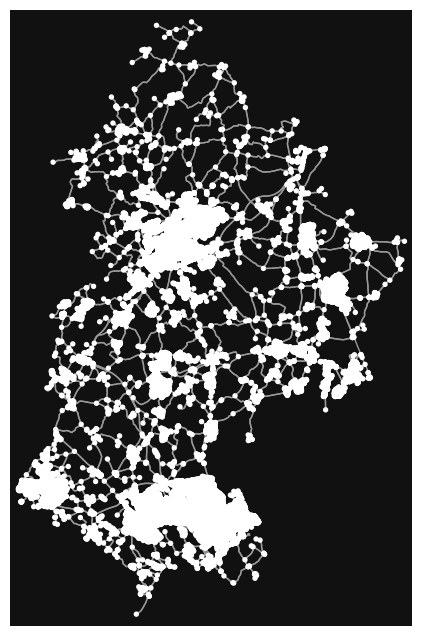

2023-04-14 05:51:21 Finished plotting the graph


(<Figure size 800x800 with 1 Axes>, <AxesSubplot:>)

In [49]:
ox.plot_graph(G)

In [50]:
#hospital_data()
filtered_df = hospital
filtered_df

,Name,Address,City,County,Latitude,Longitude
0,Lakeside Hospital,"The Lane,Wyboston,",Bedford,Bedfordshire,52.198326,-0.310281
1,Bedford Hospital South Wing,"South Wing,Kempston Road,",Bedford,Bedfordshire,52.128265,-0.472481
2,Bedford Hospital North Wing,"32-34 Kimbolton Road,,",Bedford,Bedfordshire,52.141190,-0.461765
3,Steppingley Hospital,"Ampthill Road,Steppingley,",Bedford,Bedfordshire,52.012287,-0.511812


In [51]:

city_or_county = filtered_df['City'][0]
city_or_county


'Bedford'

In [52]:
filtered_df['Addresses']= filtered_df['Name']+ filtered_df['Address']
addresses=filtered_df['Addresses']

In [53]:
# produce list of coordinates from addresses/df 

use_long_lat = 'Longitude' in filtered_df.columns and 'Latitude' in filtered_df.columns

coords = []

for _, row in filtered_df.iterrows():
    try:
        if use_long_lat:
            coord = (row['Latitude'], row['Longitude'])
        else:
            location = geolocator.geocode(row['Address'])
            coord = (location.latitude, location.longitude)
        coords.append(coord)
    except Exception as e:
        print(f"Error: {e}")
        pass

print(coords)

[(52.19832611083984, -0.3102807104587555), (52.12826538085938, -0.4724805057048798), (52.14118957519531, -0.4617651402950287), (52.01228713989258, -0.5118123292922974)]


In [54]:
# create a distance dictionary
from itertools import combinations
distance_dict = {}
for coord_pair in combinations(coords, 2):
    coord1, coord2 = coord_pair
    if coord1 == coord2:
        continue
    node1 = ox.distance.nearest_nodes(G, X=[coord1[1]], Y=[coord1[0]])[0]
    node2 = ox.distance.nearest_nodes(G, X=[coord2[1]], Y=[coord2[0]])[0]
    distance = nx.shortest_path_length(G, node1, node2, weight='length')
    distance_dict[(coord1, coord2)] = distance
    distance_dict[(coord2, coord1)] = distance




2023-04-14 05:51:36 Created nodes GeoDataFrame from graph
2023-04-14 05:51:36 Created nodes GeoDataFrame from graph
2023-04-14 05:51:36 Created nodes GeoDataFrame from graph
2023-04-14 05:51:36 Created nodes GeoDataFrame from graph
2023-04-14 05:51:37 Created nodes GeoDataFrame from graph
2023-04-14 05:51:37 Created nodes GeoDataFrame from graph
2023-04-14 05:51:37 Created nodes GeoDataFrame from graph
2023-04-14 05:51:37 Created nodes GeoDataFrame from graph
2023-04-14 05:51:38 Created nodes GeoDataFrame from graph
2023-04-14 05:51:38 Created nodes GeoDataFrame from graph
2023-04-14 05:51:38 Created nodes GeoDataFrame from graph
2023-04-14 05:51:38 Created nodes GeoDataFrame from graph


In [55]:
addresses=filtered_df.Address
addresses

0            The Lane,Wyboston,
1     South Wing,Kempston Road,
2        32-34 Kimbolton Road,,
3    Ampthill Road,Steppingley,
Name: Address, dtype: object

In [87]:

# tsp permutations code

def tsp(coords, addresses, distance_dict, first_address=None):
    shortest_distance = float('inf')
    shortest_route = None
    coord_to_address = dict(zip(coords, addresses))
    
    if first_address:
        if first_address not in addresses:
            raise ValueError("The specified first_address is not in the list of addresses.")
        first_coord = list(coord_to_address.keys())[list(coord_to_address.values()).index(first_address)]
        coords.remove(first_coord)
        permutations = (tuple([first_coord] + list(route)) for route in itertools.permutations(coords))
    else:
        permutations = itertools.permutations(coords)

    for route in permutations:
        route_distance = 0
        for i in range(len(route)):
            if i == len(route) - 1:
                route_distance += distance_dict[(route[i], route[0])]
            else:
                route_distance += distance_dict[(route[i], route[i + 1])]
        if route_distance < shortest_distance:
            shortest_distance = route_distance
            shortest_route = route
    
    shortest_route_addresses = [coord_to_address[coord] for coord in shortest_route]
    shortest_route_coords = [coord for coord in shortest_route]
    
    return shortest_route_addresses, shortest_route_coords, shortest_distance




In [88]:
# greedy algorithm code

def tsp_greedy(coords, addresses, distance_dict, first_address=None):
    if first_address:
        first_coord = coords[addresses.index(first_address)]
    else:
        first_coord = coords[0]
        first_address = addresses[0]

    remaining_coords = [coord for coord in coords if coord != first_coord]
    remaining_addresses = [address for address in addresses if address != first_address]

    shortest_route_coords_g = [first_coord]
    shortest_route_addresses_g = [first_address]
    shortest_distance_g = 0

    while remaining_coords:
        current_coord = shortest_route_coords_g[-1]
        min_distance = float("inf")
        next_coord = None
        next_address = None

        for coord, address in zip(remaining_coords, remaining_addresses):
            distance = distance_dict[(current_coord, coord)]
            if distance < min_distance:
                min_distance = distance
                next_coord = coord
                next_address = address

        shortest_route_coords_g.append(next_coord)
        shortest_route_addresses_g.append(next_address)
        shortest_distance_g += min_distance
        remaining_coords.remove(next_coord)
        remaining_addresses.remove(next_address)

    return shortest_route_addresses_g, shortest_route_coords_g, shortest_distance_g


In [ ]:
#testing first address functionality.
'''
addresses=list(filtered_df['Address'])
user_first_address =  addresses[0]
shortest_route_addresses, shortest_route_coords,shortest_distance = tsp(coords, addresses, distance_dict,first_address=user_first_address)
addresses
'''

In [58]:
start_address=None

In [61]:
# run the two tsp algorithms
shortest_route_addresses, shortest_route_coords,shortest_distance = tsp(coords, addresses, distance_dict,first_address=start_address)
shortest_route_addresses_g, shortest_route_coords_g, shortest_distance_g= tsp_greedy(coords, addresses, distance_dict, first_address=start_address)


In [99]:
# compare the results and pick the shortest route from the two lengths.

def perm_or_greedy(G,shortest_route_addresses, shortest_route_coords,shortest_distance,shortest_route_addresses_g, shortest_route_coords_g, shortest_distance_g):


    # Find the nearest nodes for each coordinate in the shortest route
    nodes = [ox.distance.nearest_nodes(G, X=[coord[1]], Y=[coord[0]])[0] for coord in shortest_route_coords]
    shortest_paths = [nx.shortest_path(G, nodes[i], nodes[i + 1], weight='length') for i in range(len(nodes) - 1)]
    path_lengths = [nx.shortest_path_length(G, nodes[i], nodes[i + 1], weight='length') / 1609.34 for i in range(len(nodes) - 1)]

    # doing the tsp_greedy conversion to nodes and network distance
    nodes_g = [ox.distance.nearest_nodes(G, X=[coord[1]], Y=[coord[0]])[0] for coord in shortest_route_coords_g]
    shortest_paths_g = [nx.shortest_path(G, nodes_g[i], nodes_g[i + 1], weight='length') for i in range(len(nodes_g) - 1)]
    path_lengths_g = [nx.shortest_path_length(G, nodes_g[i], nodes_g[i + 1], weight='length') / 1609.34 for i in range(len(nodes_g) - 1)]

    # Find the shortest path
    if sum(path_lengths) < sum(path_lengths_g):
        shortest_paths = shortest_paths
        shortest_route_addresse = shortest_route_addresses
        shortest_route_coord = shortest_route_coords
    else:
        shortest_paths = shortest_paths_g
        shortest_route_addresse = shortest_route_addresses_g
        shortest_route_coord = shortest_route_coords_g

    return shortest_route_addresse, shortest_route_coord

In [100]:
# call the above function and check outputs

shortest_route_addresse, shortest_route_coord= perm_or_greedy(G,shortest_route_addresses, shortest_route_coords,shortest_distance,shortest_route_addresses_g, shortest_route_coords_g, shortest_distance_g)
print(shortest_route_addresse)
print(shortest_route_coord)



2023-04-14 06:16:51 Created nodes GeoDataFrame from graph
2023-04-14 06:16:51 Created nodes GeoDataFrame from graph
2023-04-14 06:16:51 Created nodes GeoDataFrame from graph
2023-04-14 06:16:51 Created nodes GeoDataFrame from graph
2023-04-14 06:16:52 Created nodes GeoDataFrame from graph
2023-04-14 06:16:52 Created nodes GeoDataFrame from graph
2023-04-14 06:16:52 Created nodes GeoDataFrame from graph
2023-04-14 06:16:52 Created nodes GeoDataFrame from graph
['The Lane,Wyboston,', '32-34 Kimbolton Road,,', 'South Wing,Kempston Road,', 'Ampthill Road,Steppingley,']
[(52.19832611083984, -0.3102807104587555), (52.14118957519531, -0.4617651402950287), (52.12826538085938, -0.4724805057048798), (52.01228713989258, -0.5118123292922974)]


In [101]:
nodes = [ox.distance.nearest_nodes(G, X=[coord[1]], Y=[coord[0]])[0] for coord in shortest_route_coord]
shortest_paths = [nx.shortest_path(G, nodes[i], nodes[i + 1], weight='length') for i in range(len(nodes) - 1)]
path_lengths = [nx.shortest_path_length(G, nodes[i], nodes[i + 1], weight='length')/1609.34 for i in range(len(nodes) - 1)]



2023-04-14 06:17:00 Created nodes GeoDataFrame from graph
2023-04-14 06:17:00 Created nodes GeoDataFrame from graph
2023-04-14 06:17:00 Created nodes GeoDataFrame from graph
2023-04-14 06:17:00 Created nodes GeoDataFrame from graph


In [102]:
len(shortest_route_addresse)

4

In [103]:
len(shortest_route_coord)

4

In [104]:
shortest_route_coord

[(52.19832611083984, -0.3102807104587555),
 (52.14118957519531, -0.4617651402950287),
 (52.12826538085938, -0.4724805057048798),
 (52.01228713989258, -0.5118123292922974)]

In [105]:
import folium

# Create a map centered on the first address in the shortest route
map_centre = shortest_route_coord[1]
m = folium.Map(location=map_centre, max_bounds=True)


# Add markers for each address in the shortest route
for i, (address, coord) in enumerate(zip(shortest_route_addresse, shortest_route_coord)):
    tooltip = f"{i+1}. {address}"
    folium.Marker(location=coord, tooltip=tooltip).add_to(m)

# Draw the shortest paths on the map
for path in shortest_paths:
    route_nodes_coords = [G.nodes[node] for node in path]
    route_coords = [(node['y'], node['x']) for node in route_nodes_coords]
    folium.PolyLine(route_coords, color='blue', weight=2.5).add_to(m)

# Display the map
m

In [106]:
distance_data = {
    'From': shortest_route_addresse[:-1],
    'To': shortest_route_addresse[1:],
    'Distance (miles)': [round(dist,2) for dist in path_lengths],
    'Cumulative Distance (miles)': [round(sum(path_lengths[:i+1]),2) for i in range(len(path_lengths))]
}
df = pd.DataFrame(distance_data)
df

,From,To,Distance (miles),Cumulative Distance (miles)
0,"The Lane,Wyboston,","32-34 Kimbolton Road,,",9.48,9.48
1,"32-34 Kimbolton Road,,","South Wing,Kempston Road,",1.59,11.07
2,"South Wing,Kempston Road,","Ampthill Road,Steppingley,",9.00,20.07


In [ ]:
# old tsp code
'''
import itertools

def distance(coord1, coord2):
    # Calculates the Euclidean distance between two coords
    x1, y1 = coord1
    x2, y2 = coord2
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


def manhattan_distance(coord1, coord2):
    # Calculates the Manhattan distance between two coords
    x1, y1 = coord1
    x2, y2 = coord2
    return abs(x1 - x2) + abs(y1 - y2)



def tsp(coords, addresses, distance_dict):
    shortest_distance = float('inf')
    shortest_route = None
    coord_to_address = dict(zip(coords, addresses))
    for route in itertools.permutations(coords):
        route_distance = 0
        for i in range(len(route)):
            if i == len(route) - 1:
                route_distance += distance_dict[(route[i], route[0])]
            else:
                route_distance += distance_dict[(route[i], route[i + 1])]
        if route_distance < shortest_distance:
            shortest_distance = route_distance
            shortest_route = route
    shortest_route_addresses = [coord_to_address[coord] for coord in shortest_route]
    shortest_route_coords = [coord for coord in shortest_route]
    return shortest_route_addresses, shortest_route_coords, shortest_distance
'''